WITHOUT WAVELET TRANSFORM

Data loaded from: C:/Users/Ambika/Downloads/g4.areaAvgTimeSeries.TRMM_3B42_7_precipitation.19971231-20191231.67E_6N_97E_36N.csv
Original (3-hourly) data points: 64280
Original (3-hourly) data head:
                       Precip
Date                         
1997-12-31 22:30:00  0.031764
1998-01-01 01:30:00  0.049993
1998-01-01 04:30:00  0.047055
1998-01-01 07:30:00  0.059779
1998-01-01 10:30:00  0.051856

Resampled (Daily) data points: 8036
Resampled (Daily) data head:
              Precip
Date                
1997-12-31  0.031764
1998-01-01  0.383177
1998-01-02  0.347134
1998-01-03  0.369574
1998-01-04  0.210791
Generated features with shape: (8033, 7)

Generated Features DataFrame Head:
              Precip  dayofyear   sin_doy   cos_doy  lag_Precip_1D  \
Date                                                                 
1998-01-03  0.369574          3  0.051584  0.998669       0.347134   
1998-01-04  0.210791          4  0.068755  0.997634       0.369574   
1998-01-05  0.052095  

c:\Users\Ambika\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 30, 100)        │        42,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,301 (481.64 KB)

 Trainable params: 123,301 (481.64 KB)

 Non-trainable params: 0 (0.00 B)


Starting training for Baseline LSTM...

Training LSTM model...
Epoch 1/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 0.0260 - val_loss: 0.0094
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0126 - val_loss: 0.0100
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0120 - val_loss: 0.0093
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0114 - val_loss: 0.0082
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0101 - val_loss: 0.0085
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0107 - val_loss: 0.0082
Epoch 7/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0109 - val_loss: 0.0081
Epoch 8/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0103 - val_loss: 0.0080
Epoch 9/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0094 - val_loss: 0.0081
Epoch 10/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0094 - val_loss: 0.0082
Epoch 11/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.

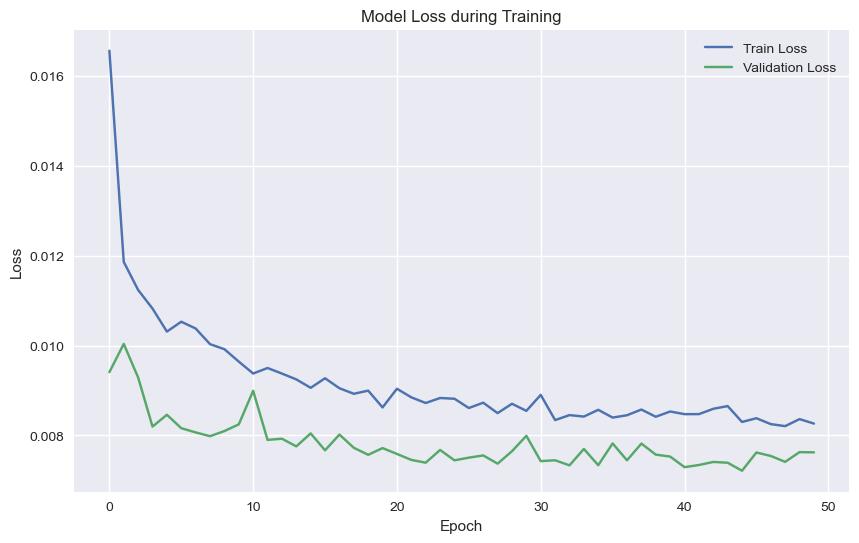

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.dates as mdates
from datetime import date

# Set proper matplotlib style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 6)

## ===========================================
## 1. Data Loading & Preprocessing (TRMM)
## ===========================================
def load_trmm_data(filepath):
    """Load and preprocess TRMM data, resampling 3-hourly to daily sums."""
    df = pd.read_csv(filepath, skiprows=8)
    df.columns = ['Date', 'Precip']
    df['Date'] = pd.to_datetime(df['Date'])
    df['Precip'] = pd.to_numeric(df['Precip'], errors='coerce')
    df = df[df['Precip'] > -999].copy()
    df.set_index('Date', inplace=True)
    print(f"Data loaded from: {filepath}")
    print(f"Original (3-hourly) data points: {len(df)}")
    print(f"Original (3-hourly) data head:\n{df.head()}")

    df_daily = df['Precip'].resample('D').sum().to_frame()
    df_daily.dropna(inplace=True)

    print(f"\nResampled (Daily) data points: {len(df_daily)}")
    print(f"Resampled (Daily) data head:\n{df_daily.head()}")

    return df_daily


trmm_filepath = "C:/Users/Ambika/Downloads/g4.areaAvgTimeSeries.TRMM_3B42_7_precipitation.19971231-20191231.67E_6N_97E_36N.csv"
trmm_df = load_trmm_data(trmm_filepath)
precip_series = trmm_df['Precip'].values

## ===========================================
## 2. Feature Engineering (Without Wavelets)
## ===========================================
def create_simple_features(df):
    """
    Feature engineering with only temporal features and lags.
    """
    features_df = df.copy() # Start with a copy of the original df

    # Add temporal features
    features_df['dayofyear'] = features_df.index.dayofyear
    features_df['sin_doy'] = np.sin(2 * np.pi * features_df['dayofyear'] / 365.25)
    features_df['cos_doy'] = np.cos(2 * np.pi * features_df['dayofyear'] / 365.25)

    # Add lagged features from the ORIGINAL precipitation series
    for lag in [1, 2, 3]: # Only the specified lags
        features_df[f'lag_Precip_{lag}D'] = features_df['Precip'].shift(lag)

    # Drop rows with NaN values created by lagging
    features_df.dropna(inplace=True)

    print(f"Generated features with shape: {features_df.shape}")
    print("\nGenerated Features DataFrame Head:")
    print(features_df.head())
    return features_df

trmm_features = create_simple_features(trmm_df)

## ===========================================
## 3. Data Preparation for LSTM (Added Feature Matrix Display)
## ===========================================


target_column = 'Precip'

selected_feature_columns = ['dayofyear', 'sin_doy', 'cos_doy', 'lag_Precip_1D', 'lag_Precip_2D', 'lag_Precip_3D']


for col in selected_feature_columns:
    if col not in trmm_features.columns:
        raise ValueError(f"Selected feature column '{col}' not found in the DataFrame.")

features = trmm_features[selected_feature_columns]

X = features.values
y = trmm_features[target_column].values

# Scale the data
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)) # Reshape for scaler

print(f"\nScaled X shape (selected features): {X_scaled.shape}")
print(f"Scaled y shape: {y_scaled.shape}")


print("\n--- Scaled Feature Matrix (X_scaled) Head ---")
print(X_scaled[:5]) # Display first 5 rows
print(f"Number of features (columns): {X_scaled.shape[1]}")
print("---------------------------------------------")


def create_sequences(data, target, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(data):
            break
        seq_x, seq_y = data[i:end_ix], target[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps_in = 30
n_steps_out = 1

X_seq, y_seq = create_sequences(X_scaled, y_scaled, n_steps_in, n_steps_out)

print(f"\nLSTM Input X_seq shape: {X_seq.shape}")
print(f"LSTM Output y_seq shape: {y_seq.shape}")


train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

## ===========================================
## 4. LSTM Model Definition and Training
## ===========================================

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(n_steps_in, X_seq.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=n_steps_out))

model.compile(optimizer='adam', loss='mse')
model.summary()


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


import time
print("\nStarting training for Baseline LSTM...")
start_time = time.time()
# Train the model
print("\nTraining LSTM model...")
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)
end_time = time.time()
training_time_seconds_BASELINE = end_time - start_time
training_time_minutes_BASELINE = training_time_seconds_BASELINE / 60
print(f"Training for Baseline LSTM completed in: {training_time_seconds_BASELINE:.2f} seconds ({training_time_minutes_BASELINE:.2f} minutes)")


# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

Mean Absolute Error (MAE) on Test Set: 0.3533
Root Mean Squared Error (RMSE) on Test Set: 0.4891


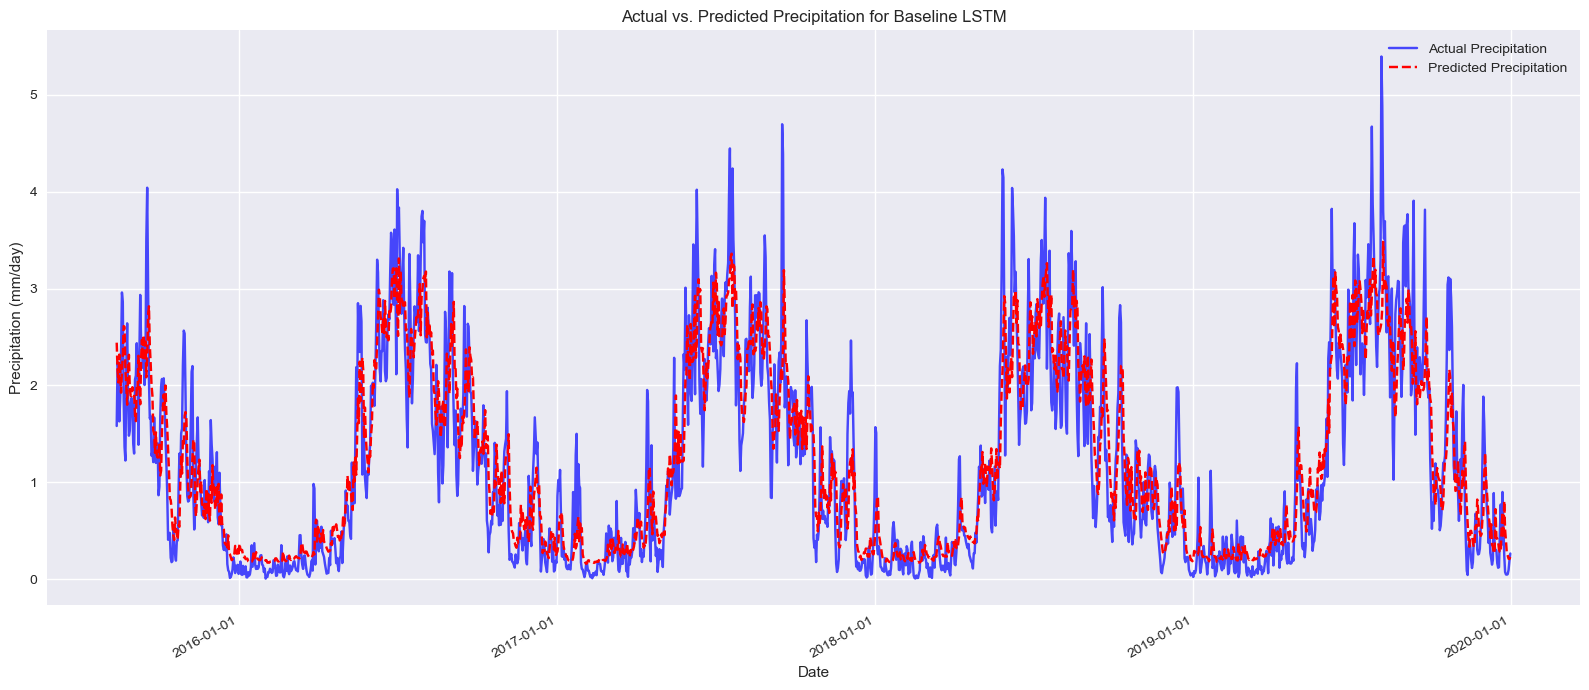

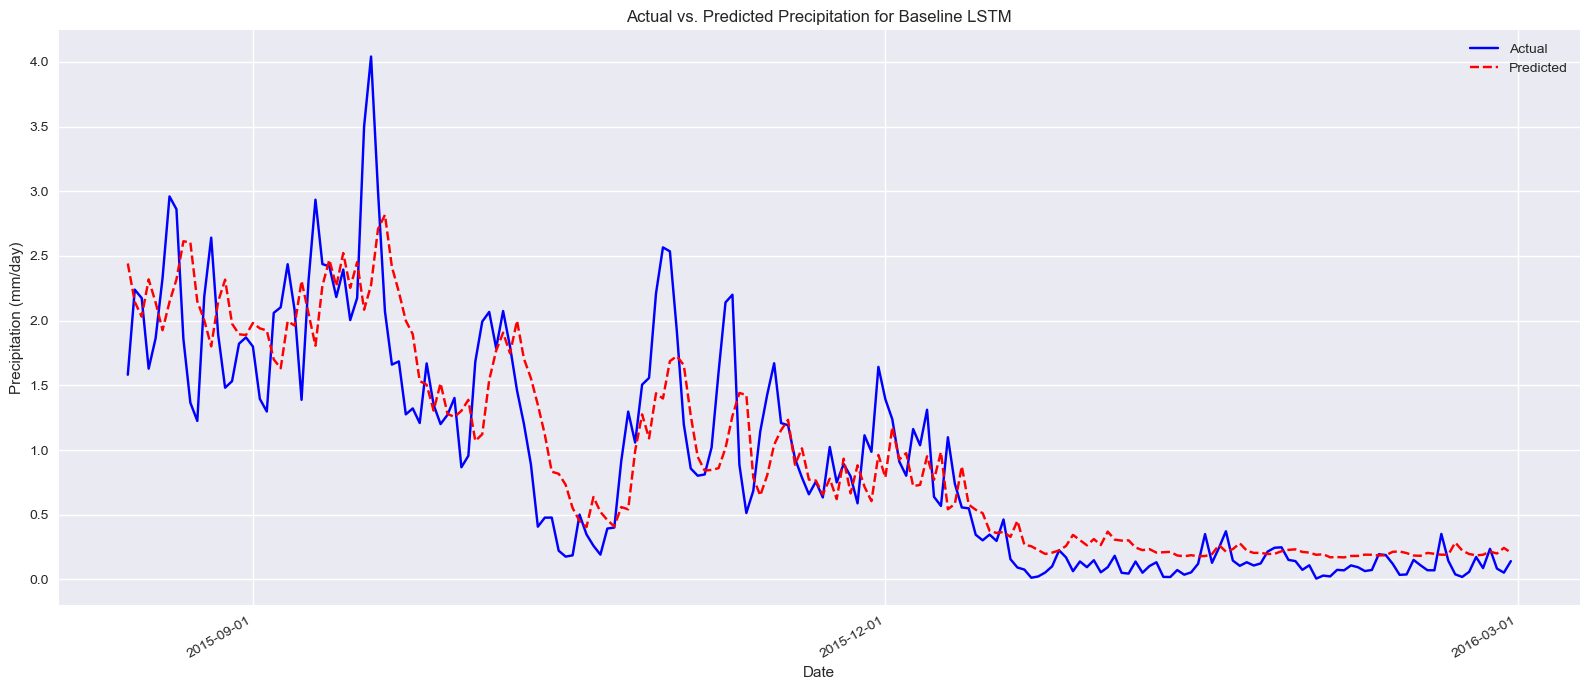

There are 8035 days between 1997-12-31 and 2019-12-31.


In [ ]:
# ===========================================
## 5. Prediction and Evaluation
## ===========================================

# Make predictions on the test set
y_pred_scaled = model.predict(X_test)


y_test_original_BASELINE = scaler_y.inverse_transform(y_test.reshape(-1, n_steps_out))
y_pred_original_BASELINE = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, n_steps_out))


mae = mean_absolute_error(y_test_original_BASELINE, y_pred_original_BASELINE)
rmse = np.sqrt(mean_squared_error(y_test_original_BASELINE, y_pred_original_BASELINE))


print(f"\nMean Absolute Error (MAE) on Test Set: {mae:.4f}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse:.4f}")

# Plot actual vs. predicted values
test_dates_start_index = trmm_features.index[n_steps_in + train_size]
test_dates = trmm_features.loc[test_dates_start_index:].index[:len(y_test_original_BASELINE)]

plt.figure(figsize=(16, 7))
plt.plot(test_dates, y_test_original_BASELINE, label='Actual Precipitation', color='blue', alpha=0.7)
plt.plot(test_dates, y_pred_original_BASELINE, label='Predicted Precipitation', color='red', linestyle='--')
plt.title('Actual vs. Predicted Precipitation for Baseline LSTM')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm/day)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 7))
start_idx = 0
end_idx = min(200, len(y_test_original_BASELINE))

plt.plot(test_dates[start_idx:end_idx], y_test_original_BASELINE[start_idx:end_idx], label='Actual', color='blue')
plt.plot(test_dates[start_idx:end_idx], y_pred_original_BASELINE[start_idx:end_idx], label='Predicted', color='red', linestyle='--')
plt.title(f'Actual vs. Predicted Precipitation for Baseline LSTM')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm/day)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

start_date = date(1997, 12, 31)
end_date = date(2019, 12, 31)
delta = end_date - start_date
print(f"There are {delta.days} days between {start_date} and {end_date}.")

d1 to d6 _ db* precipitation prediction code starts from here

In [ ]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.dates as mdates

# Set proper matplotlib style (using 'seaborn-v0_8' instead of 'seaborn')
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 6)

In [ ]:
## ===========================================
## 1. Data Loading & Preprocessing (TRMM)
## ===========================================
def load_trmm_data(filepath):
    """Load and preprocess TRMM data"""
    df = pd.read_csv("C:/Users/Ambika/Downloads/g4.areaAvgTimeSeries.TRMM_3B42_7_precipitation.19971231-20191231.67E_6N_97E_36N.csv", skiprows=8)
    df.columns = ['Date', 'Precip']
    df['Date'] = pd.to_datetime(df['Date'])
    df['Precip'] = pd.to_numeric(df['Precip'], errors='coerce')
     # Filter out bad data and ensure a copy to prevent SettingWithCopyWarning
    df = df[df['Precip'] > -999] .copy()  # .copy() prevents warnings
    # Set 'Date' as index immediately for time series operations
    df.set_index('Date', inplace=True)
    print(f"Data loaded from: {filepath}")
    print(f"Original (3-hourly) data points: {len(df)}")
    print(f"Original (3-hourly) data head:\n{df.head()}")


    df_daily = df['Precip'].resample('D').sum().to_frame()


    df_daily.dropna(inplace=True)


    print(f"\nResampled (Daily) data points: {len(df_daily)}")
    print(f"Resampled (Daily) data head:\n{df_daily.head()}")

    return df_daily


trmm_filepath = "C:/Users/Ambika/Downloads/g4.areaAvgTimeSeries.TRMM_3B42_7_precipitation.19971231-20191231.67E_6N_97E_36N.csv"
trmm_df = load_trmm_data(trmm_filepath)
precip_series = trmm_df['Precip'].values


Data loaded from: C:/Users/Ambika/Downloads/g4.areaAvgTimeSeries.TRMM_3B42_7_precipitation.19971231-20191231.67E_6N_97E_36N.csv
Original (3-hourly) data points: 64280
Original (3-hourly) data head:
                       Precip
Date                         
1997-12-31 22:30:00  0.031764
1998-01-01 01:30:00  0.049993
1998-01-01 04:30:00  0.047055
1998-01-01 07:30:00  0.059779
1998-01-01 10:30:00  0.051856

Resampled (Daily) data points: 8036
Resampled (Daily) data head:
              Precip
Date                
1997-12-31  0.031764
1998-01-01  0.383177
1998-01-02  0.347134
1998-01-03  0.369574
1998-01-04  0.210791


In [ ]:
precip_series = trmm_df['Precip'].values
len(precip_series)

8036

In [ ]:
trmm_df

,Precip
Date,
1997-12-31,0.031764
1998-01-01,0.383177
1998-01-02,0.347134
1998-01-03,0.369574
1998-01-04,0.210791
...,...
2019-12-27,0.047557
2019-12-28,0.052557
2019-12-29,0.096541


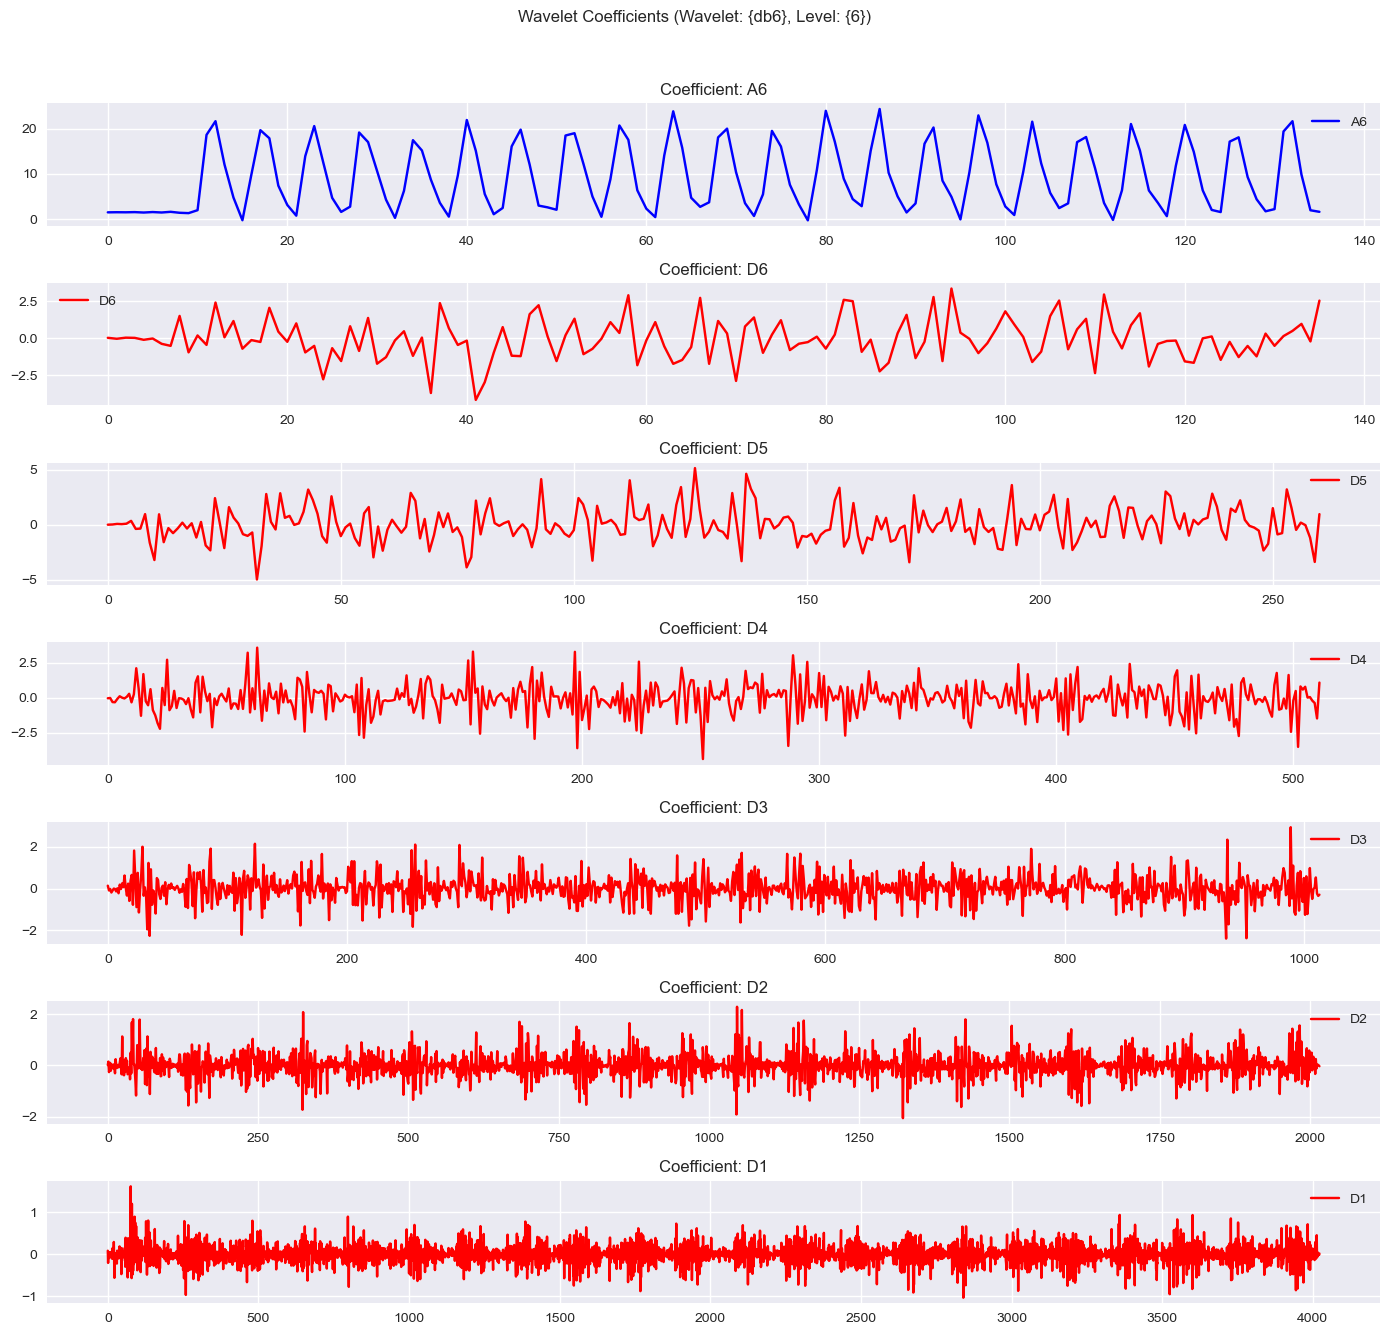

In [ ]:
## ===========================================
## 2. Wavelet Decomposition (Focus on Extremes)
## ===========================================
# Decompose with db6

def wavelet_decomposition_extremes(series, wavelet='db6', level=6):
    """Decompose signal and preserve extremes in details"""
    coeffs = pywt.wavedec(series, wavelet, level=level)


    # Dynamic labels for visualization
    labels = [f'A{level}'] + [f'D{level - i + 1}' for i in range(1, level + 1)]


    # Visualize coefficients
    fig, axs = plt.subplots(len(coeffs), 1, figsize=(14, 2 * len(coeffs)))
    for i, (c, label) in enumerate(zip(coeffs, labels)):
        axs[i].plot(c, 'r-' if i > 0 else 'b-', label=f'{label}')
        axs[i].legend()
        axs[i].grid(True)
        axs[i].set_title(f'Coefficient: {label}') # Add title for each subplot
    plt.suptitle('Wavelet Coefficients (Wavelet: {db6}, Level: {6})')
    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout to prevent suptitle overlap
    plt.show()

    return coeffs
level = 6
coeffs = wavelet_decomposition_extremes(precip_series, 'db6', level)


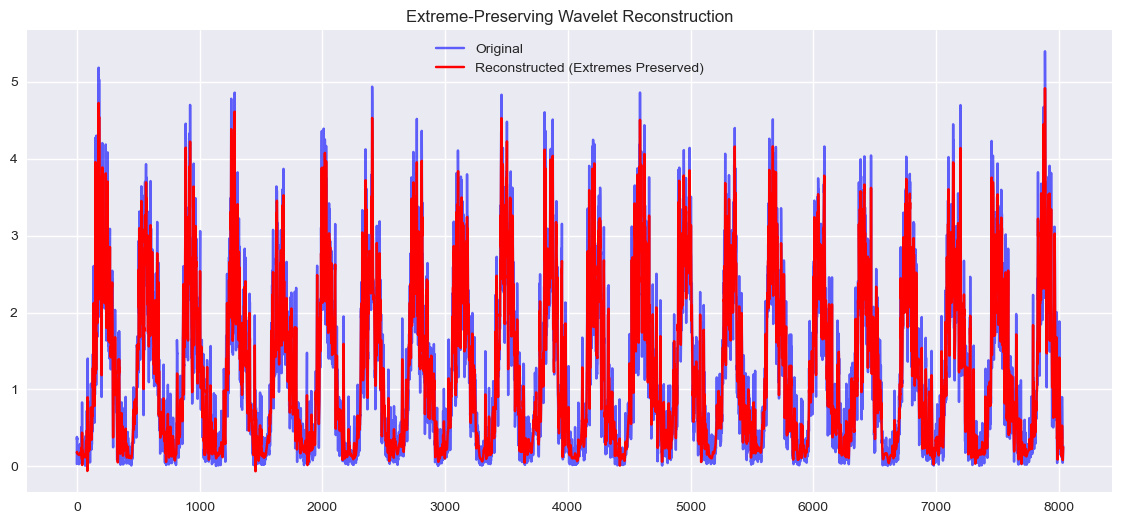

In [ ]:
## ===========================================
## 3. Extreme-Preserving Reconstruction
## ===========================================
def reconstruct_extremes(coeffs, original_length, wavelet='db6', threshold_factor=1.5):
    """Reconstruct signal while preserving extremes using thresholding."""
    # Threshold details to enhance extremes (Donoho-Johnstone adaptive)
    # The threshold is typically applied to detail coefficients only.
    # The approximation coefficient (coeffs[0]) is usually kept as is.

    # Calculate threshold based on the finest detail coefficient (coeffs[-1] or coeffs[level])
    # median(abs(D)) / 0.6745 is an estimate of standard deviation for noise.
    # If coeffs[-1] is empty or too short, handle it gracefully.
    if len(coeffs[-1]) > 0:
        threshold = threshold_factor * np.median(np.abs(coeffs[-1])) / 0.6745
    else:
        print("Warning: Finest detail coefficient is empty. Using a default threshold.")
        threshold = threshold_factor * 0.1 # Fallback threshold

    # Apply soft thresholding to detail coefficients only
    # coeffs[0] is the approximation (A_level), it's not thresholded.
    denoised_coeffs = [coeffs[0]] + [pywt.threshold(c, threshold, mode='soft') for c in coeffs[1:]]

    # Reconstruct
    reconstructed = pywt.waverec(denoised_coeffs, wavelet)[:original_length]

    # Verify extremes preservation
    plt.figure(figsize=(14, 6))
    plt.plot(precip_series, 'b-', alpha=0.6, label='Original')
    plt.plot(reconstructed, 'r-', label='Reconstructed (Extremes Preserved)')
    plt.title('Extreme-Preserving Wavelet Reconstruction')
    plt.legend()
    plt.grid(True)
    plt.show()

    return reconstructed

# Perform reconstruction using the coeffs from decomposition
reconstructed_precip = reconstruct_extremes(coeffs, len(precip_series), wavelet='db6')
trmm_df['Precip_Reconstructed'] = reconstructed_precip



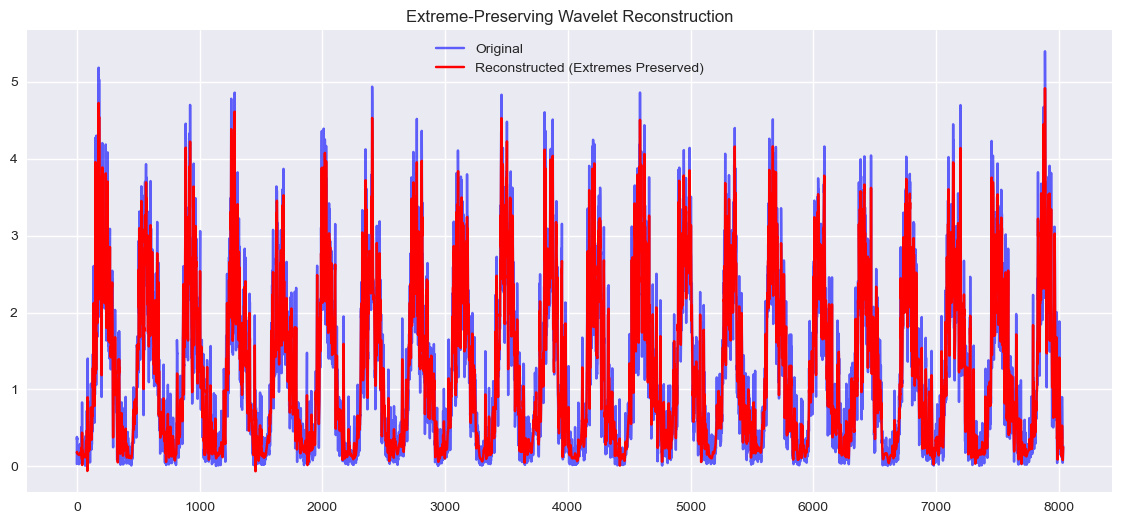

Generated features with shape: (8022, 17)

Generated Features DataFrame Head:
              Precip  Precip_Reconstructed        A6            D6  \
Date                                                                 
1998-01-14  0.154510              0.154229  0.001819 -3.434959e-07   
1998-01-15  0.122579              0.152481  0.002158 -4.074596e-07   
1998-01-16  0.029087              0.150894  0.002535 -4.786815e-07   
1998-01-17  0.135018              0.149697  0.002948 -5.567150e-07   
1998-01-18  0.079088              0.148923  0.003399 -6.418088e-07   

                      D5            D4        D3            D2            D1  \
Date                                                                           
1998-01-14  6.580238e-08  5.015628e-07 -0.000002 -2.092108e-07 -9.822618e-07   
1998-01-15  7.805571e-08  5.949608e-07 -0.000002 -2.481688e-07 -1.165173e-06   
1998-01-16  9.169945e-08  6.989570e-07 -0.000002 -2.915475e-07 -1.368839e-06   
1998-01-17  1.066481e-07  8.128

In [ ]:
# Perform reconstruction using the coeffs from decomposition
reconstructed_precip = reconstruct_extremes(coeffs, len(precip_series), wavelet='db6')
trmm_df['Precip_Reconstructed'] = reconstructed_precip

## ===========================================
## 4. Feature Engineering (Corrected Wavelet Features)
## ===========================================
def create_extreme_features(df, level=6, wavelet='db6'):
    """
    Feature engineering with wavelet transforms, temporal features, and lags.
    Correctly uses pywt.upcoef for wavelet feature extraction.
    """
    original_series = df['Precip'].values

    # Perform wavelet decomposition
    coeffs = pywt.wavedec(original_series, wavelet, level=level)

    features_df = df.copy() # Start with a copy of the original df

    # Upsample and add Approximation coefficient (A_level) as a feature
    # pywt.upcoef('a', coeffs[0], wavelet, level) reconstructs A_level to original length
    a_rec = pywt.upcoef('a', coeffs[0], wavelet, level=level)[:len(original_series)]
    features_df[f'A{level}'] = a_rec

    # Upsample and add Detail coefficients (D1, D2, ..., D_level) as features
    # coeffs[1] corresponds to D_level (finest detail)
    # coeffs[level] corresponds to D1 (coarsest detail)
    # We iterate from D_level down to D1
    for i in range(1, level + 1):
        # pywt.upcoef('d', coeffs[i], wavelet, level) reconstructs D_{level-i+1} to original length
        d_rec = pywt.upcoef('d', coeffs[i], wavelet, level=level)[:len(original_series)]
        # Use a label consistent with pywt.wavedec output (D_level down to D1)
        features_df[f'D{level - i + 1}'] = d_rec

    # Add temporal features
    features_df['dayofyear'] = features_df.index.dayofyear
    features_df['sin_doy'] = np.sin(2 * np.pi * features_df['dayofyear'] / 365.25)
    features_df['cos_doy'] = np.cos(2 * np.pi * features_df['dayofyear'] / 365.25)

    # Add lagged features from the ORIGINAL precipitation series
    for lag in [1, 2, 3, 7, 14]: # Lags for 1-day, 2-day, 3-day, 1-week, 2-week
        features_df[f'lag_Precip_{lag}D'] = features_df['Precip'].shift(lag)

    # Drop rows with NaN values created by lagging
    features_df.dropna(inplace=True)

    print(f"Generated features with shape: {features_df.shape}")
    return features_df

# Generate features for the TRMM data
trmm_features = create_extreme_features(trmm_df, level=level, wavelet='db6')

# Display head of features DataFrame to verify
print("\nGenerated Features DataFrame Head:")
print(trmm_features.head())

In [ ]:
## ===========================================
## 5. Data Preparation for LSTM
## ===========================================

# Define target variable (y) and features (X)
# We use the original 'Precip' as target, and other columns as features.
# You could also consider 'Precip_Reconstructed' as target if that's your goal.
target_column = 'Precip'
features = trmm_features.drop(columns=[target_column]) # Drop the target from features

X = features.values
y = trmm_features[target_column].values

# Scale the data
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)) # Reshape for scaler

print(f"\nScaled X shape: {X_scaled.shape}")
print(f"Scaled y shape: {y_scaled.shape}")

# Create sequences for LSTM (sliding window)
# This function converts an array of values into a dataset matrix
def create_sequences(data, target, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(data):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = data[i:end_ix], target[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps_in = 30  # e.g., use 30 past days to predict
n_steps_out = 1  # e.g., predict the next 1 day

X_seq, y_seq = create_sequences(X_scaled, y_scaled, n_steps_in, n_steps_out)

print(f"\nLSTM Input X_seq shape: {X_seq.shape}") # (samples, n_steps_in, n_features)
print(f"LSTM Output y_seq shape: {y_seq.shape}") # (samples, n_steps_out, n_targets)

# Train-Test Split (Chronological Split)
# It's crucial for time series to split chronologically.
train_size = int(len(X_seq) * 0.8) # 80% for training
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Scaled X shape: (8022, 16)
Scaled y shape: (8022, 1)

LSTM Input X_seq shape: (7992, 30, 16)
LSTM Output y_seq shape: (7992, 1, 1)
X_train shape: (6393, 30, 16), y_train shape: (6393, 1, 1)
X_test shape: (1599, 30, 16), y_test shape: (1599, 1, 1)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 30, 100)        │        46,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           101 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,303 (497.28 KB)

 Trainable params: 127,303 (497.28 KB)

 Non-trainable params: 0 (0.00 B)


Starting training for WLSTM...

Training LSTM model...
Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.0240 - val_loss: 0.0095
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0111 - val_loss: 0.0083
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0098 - val_loss: 0.0073
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0089 - val_loss: 0.0069
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0082 - val_loss: 0.0063
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0077 - val_loss: 0.0059
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0068 - val_loss: 0.0051
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0067 - val_loss: 0.0047
Epoch 9/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0061 - val_loss: 0.0050
Epoch 10/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0056 - val_loss: 0.0041
Epoch 11/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0051 - v

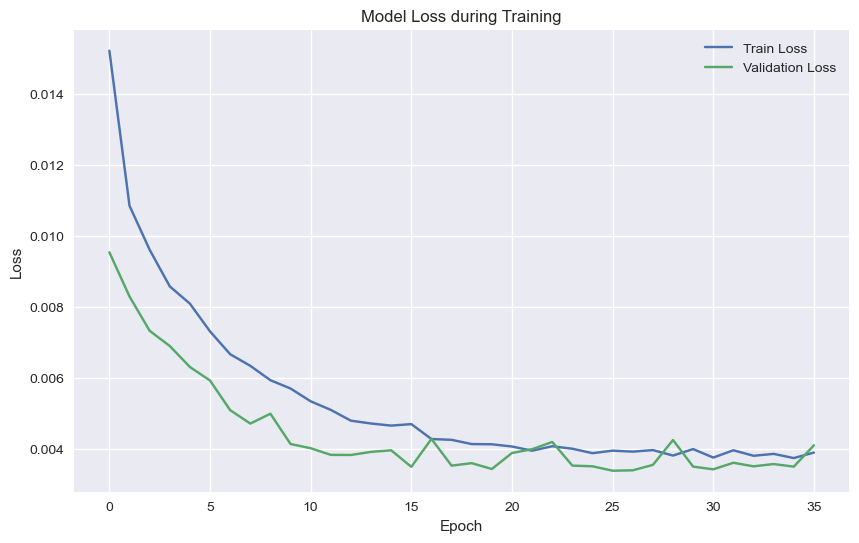

In [ ]:
## ===========================================
## 6. LSTM Model Definition and Training
## ===========================================

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(n_steps_in, X_seq.shape[2])))
model.add(Dropout(0.2)) # Dropout for regularization
model.add(LSTM(units=100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=n_steps_out * y_seq.shape[2]))
model.add(Dense(units=n_steps_out))


model.compile(optimizer='adam', loss='mse')
model.summary()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



import time


print("\nStarting training for WLSTM...")
start_time = time.time()
# Train the model
print("\nTraining LSTM model...")
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)
end_time = time.time()
training_time_seconds = end_time - start_time
training_time_minutes = training_time_seconds / 60
print(f"Training for WLSTM completed in: {training_time_seconds:.2f} seconds ({training_time_minutes:.2f} minutes)")


# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

Mean Absolute Error (MAE) on Test Set: 0.2184
Root Mean Squared Error (RMSE) on Test Set: 0.3160


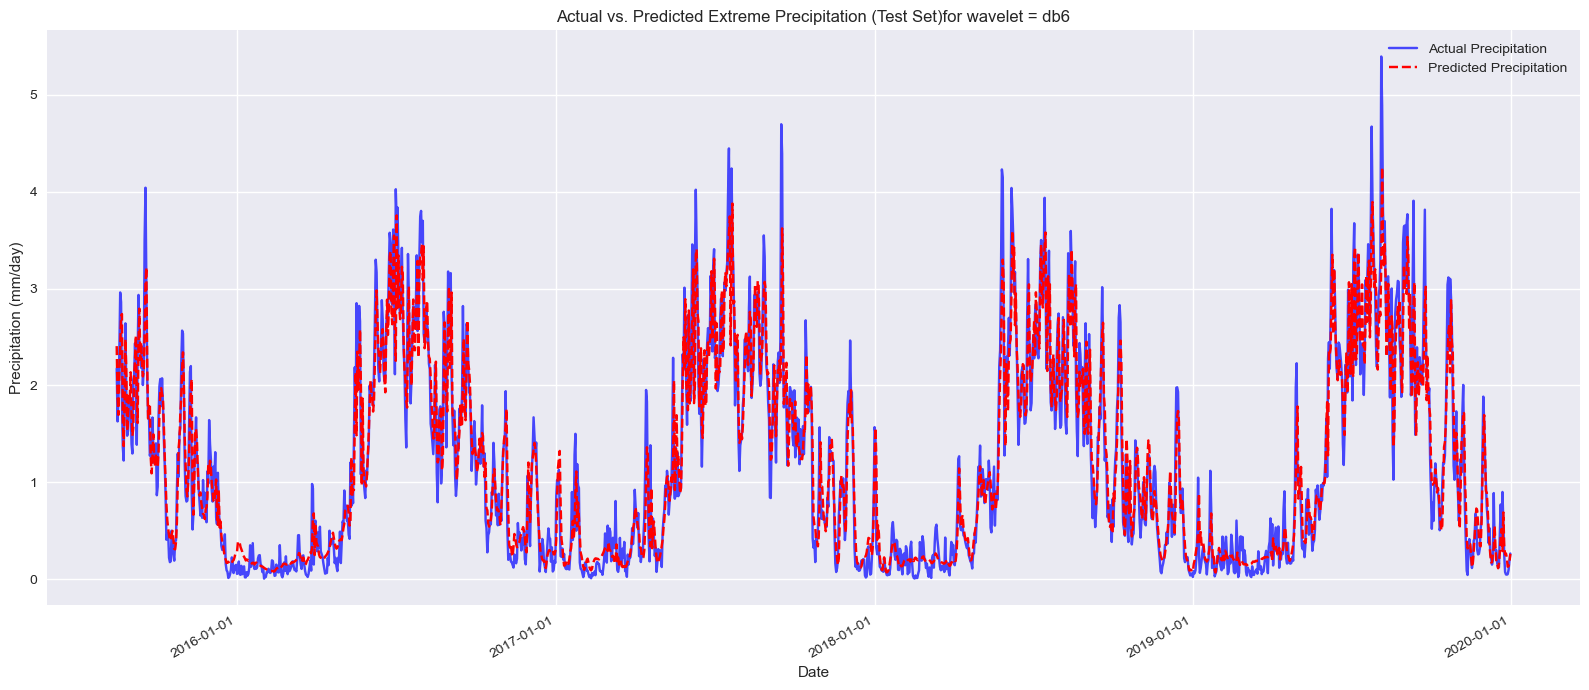

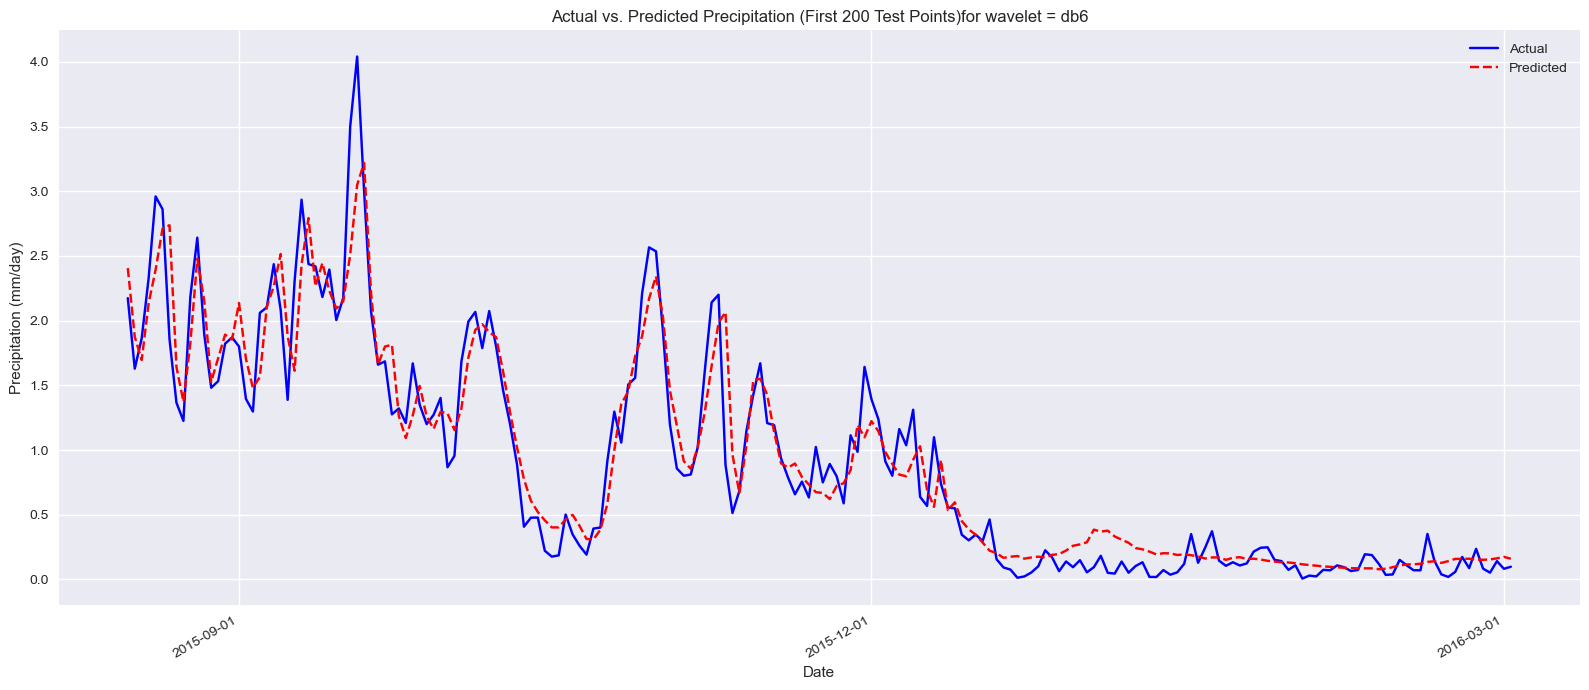

In [ ]:
## ===========================================
## 7. Prediction and Evaluation
## ===========================================

from sklearn.metrics import mean_absolute_error, mean_squared_error
# Make predictions on the test set
y_pred_scaled = model.predict(X_test)

# Inverse transform predictions and actual values to original scale
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, n_steps_out)) # Reshape for inverse transform
y_pred_original = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, n_steps_out))

# Evaluate the model
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

print(f"\nMean Absolute Error (MAE) on Test Set: {mae:.4f}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse:.4f}")


test_dates_start_index = trmm_features.index.get_loc(trmm_features.iloc[n_steps_in + train_size -1].name) + 1 # Date corresponding to the first prediction target


first_y_test_original_index_in_features_df = trmm_features.index[n_steps_in + train_size]
test_dates = trmm_features.loc[first_y_test_original_index_in_features_df:].index[:len(y_test_original)]


plt.figure(figsize=(16, 7))
plt.plot(test_dates, y_test_original, label='Actual Precipitation', color='blue', alpha=0.7)
plt.plot(test_dates, y_pred_original, label='Predicted Precipitation', color='red', linestyle='--')
plt.title('Actual vs. Predicted Extreme Precipitation (Test Set)for wavelet = db6')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm/day)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate() # Rotate and align the x-axis labels
plt.tight_layout()
plt.show()

# Additional visualization: Plotting a smaller segment for clarity
plt.figure(figsize=(16, 7))
start_idx = 0 # Adjust to focus on a specific segment
end_idx = min(200, len(y_test_original)) # Plot first 200 points or less if test set is small

plt.plot(test_dates[start_idx:end_idx], y_test_original[start_idx:end_idx], label='Actual', color='blue')
plt.plot(test_dates[start_idx:end_idx], y_pred_original[start_idx:end_idx], label='Predicted', color='red', linestyle='--')
plt.title(f'Actual vs. Predicted Precipitation (First {end_idx} Test Points)for wavelet = db6')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm/day)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # Show every 3 months
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

In [ ]:
from datetime import date

start_date = date(1997, 12, 31)
end_date = date(2019, 12, 31)

delta = end_date - start_date

print(f"There are {delta.days} days between {start_date} and {end_date}.")

There are 8035 days between 1997-12-31 and 2019-12-31.


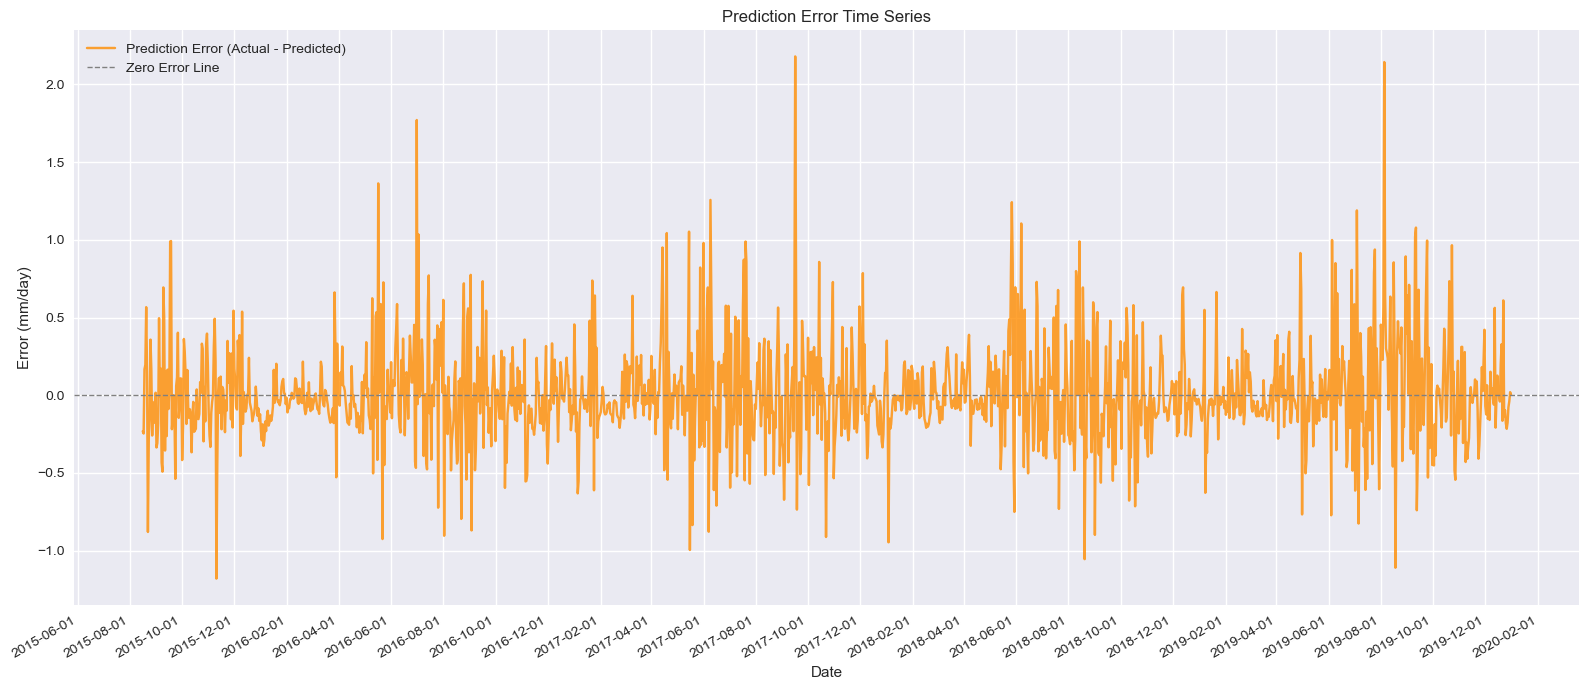

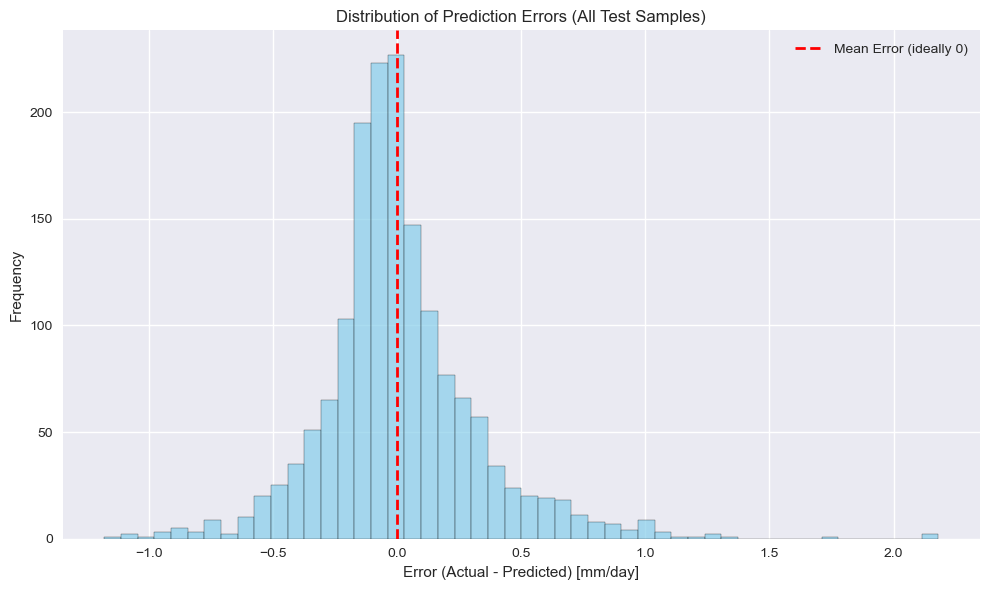

C:\Users\Ambika\AppData\Local\Temp\ipykernel_1084\1052452052.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


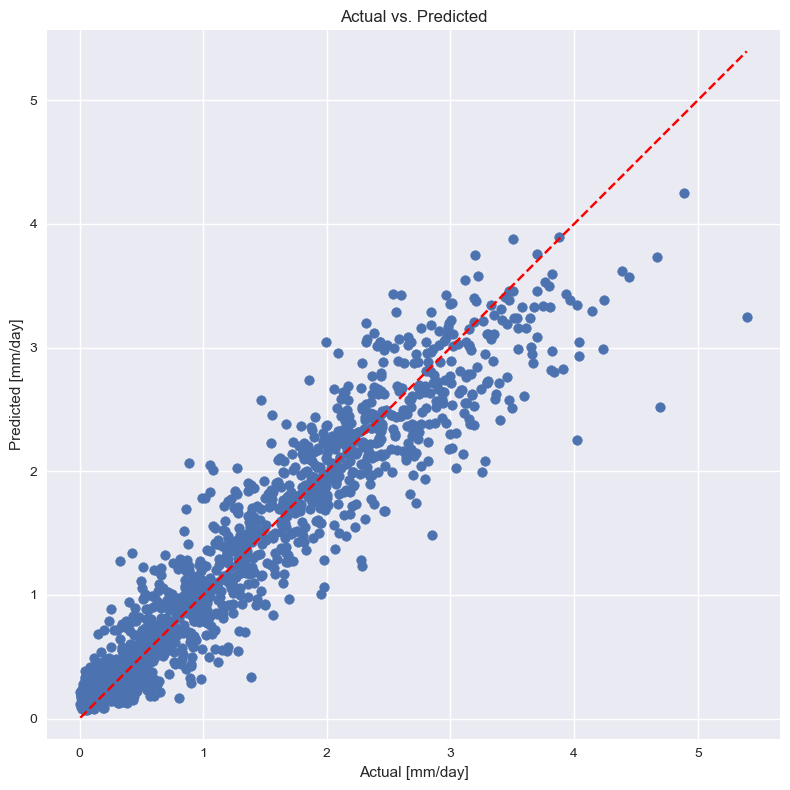

In [ ]:

plt.figure(figsize=(16, 7))
        # Calculate the error (residual)
error = y_test_original-y_pred_original
plt.plot(test_dates, error, label='Prediction Error (Actual - Predicted)', color='darkorange', alpha=0.8)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1, label='Zero Error Line')
plt.title(f'Prediction Error Time Series')
plt.xlabel('Date')
plt.ylabel('Error (mm/day)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
all_errors = y_test_original - y_pred_original
plt.hist(all_errors, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Mean Error (ideally 0)')
plt.title('Distribution of Prediction Errors (All Test Samples)')
plt.xlabel('Error (Actual - Predicted) [mm/day]')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 8))
plt.scatter(y_test_original, y_pred_original)

alpha=0.3
s=10
min_val = min(y_test_original.min(), y_pred_original.min())
max_val = max(y_test_original.max(), y_pred_original.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.title('Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.xlabel('Actual [mm/day]')
plt.ylabel('Predicted [mm/day]')
plt.axis('equal')
plt.tight_layout()
plt.show()



In [ ]:
y_pred_original_BASELINE.shape


(1601, 1)

In [ ]:
y_pred_original.shape

(1599, 1)

C:\Users\Ambika\AppData\Local\Temp\ipykernel_1084\630022687.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


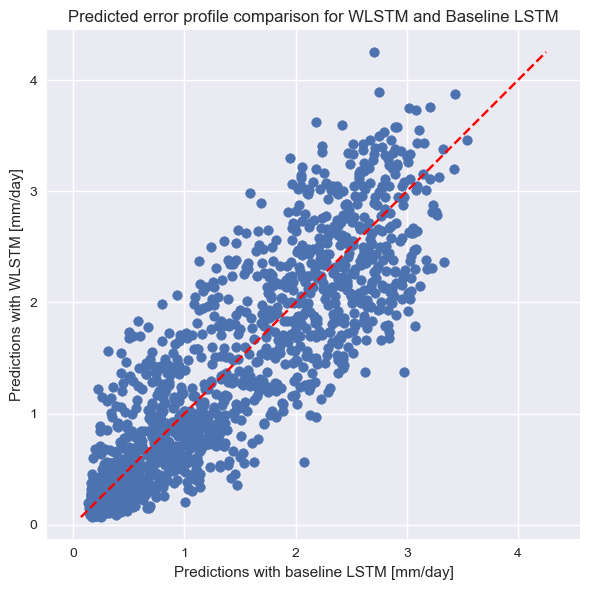

In [ ]:


plt.figure(figsize=(6, 6))# Creates a square plot figure, which is ideal for a 45-degree line to appear correctly.
plt.scatter(y_pred_original_BASELINE[:-2], y_pred_original)#**: This is the core of the scatter plot.
# y_test_original` (Actual values) are plotted on the x-axis.
# y_pred_original` (Predicted values) are plotted on the y-axis.
alpha=0.3#`: Makes the points semi-transparent, useful if many points overlap.
s=10#`: Sets the size of the markers.
min_val = min(y_pred_original_BASELINE[:-2].min(), y_pred_original.min())
max_val = max(y_pred_original_BASELINE[:-2].max(), y_pred_original.max())# These lines determine the minimum and maximum values across both your actual and predicted data. This ensures the 45-degree line spans the entire relevant range of your data.
plt.plot([min_val, max_val], [min_val, max_val], 'r--')#This draws the 45-degree reference line. Since the x and y coordinates are the same (`[min_val, max_val]` for both), it creates a perfect `y=x` line.
plt.title('Predicted error profile comparison for WLSTM and Baseline LSTM')
plt.legend()
plt.grid(True)# Standard Matplotlib commands for adding titles, labels, a legend, and a grid for readability.
plt.xlabel('Predictions with baseline LSTM [mm/day]')
plt.ylabel('Predictions with WLSTM [mm/day]')
plt.axis('equal')# This is crucial! It ensures that the scaling of the x-axis and y-axis is the same. Without this, a 45-degree line might not visually appear as 45 degrees if the axis ranges are disproportionate.
plt.tight_layout()# Adjusts plot parameters for a tight layout.
plt.show()# Displays the plot.


In [ ]:
y_test_original.shape#(1599, 1)
y_pred_original.shape#(1599, 1)
y_pred_original_BASELINE.shape

(1601, 1)

In [ ]:
test_dates.shape

(1601,)

In [ ]:
y_test_original.shape

(1599, 1)

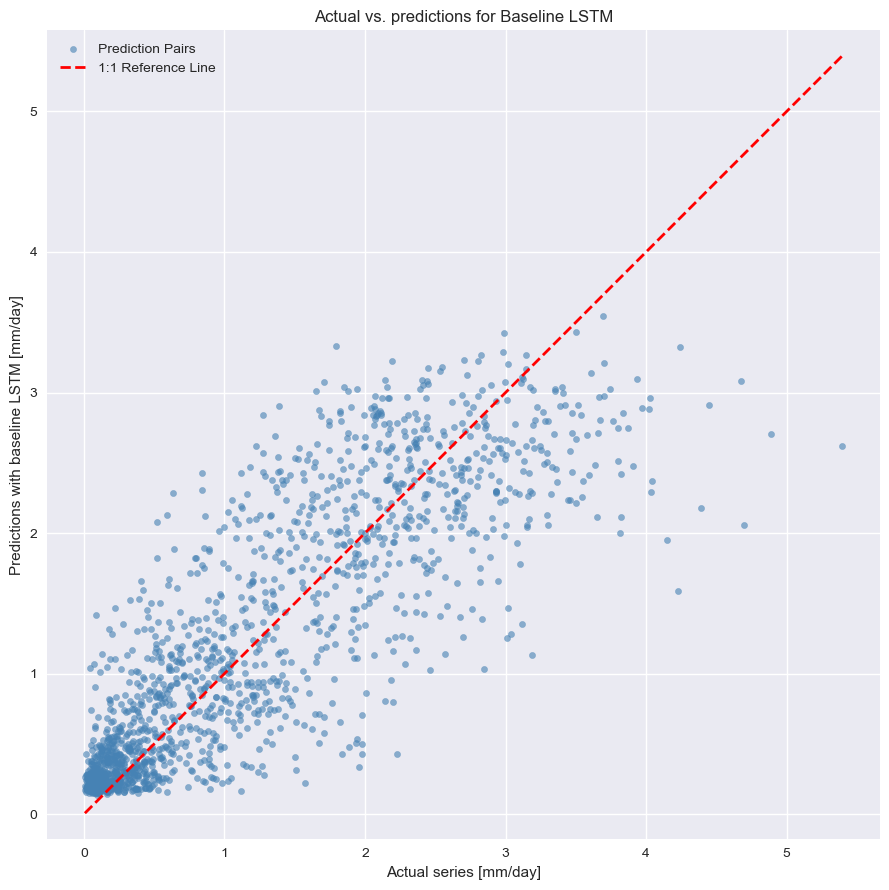

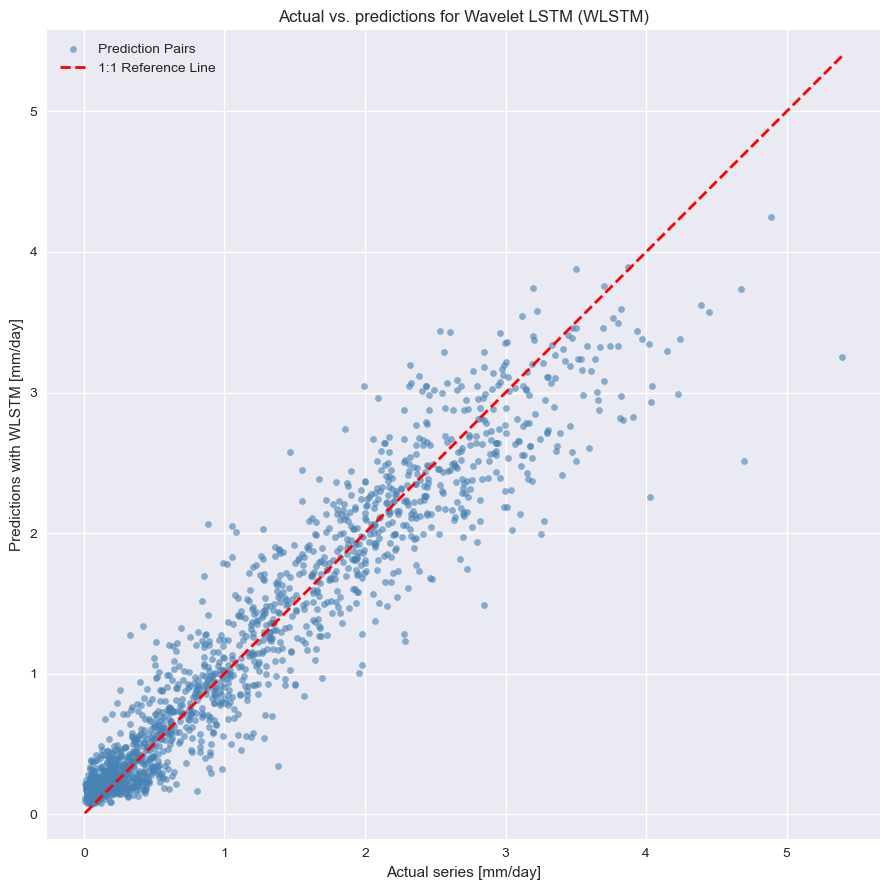

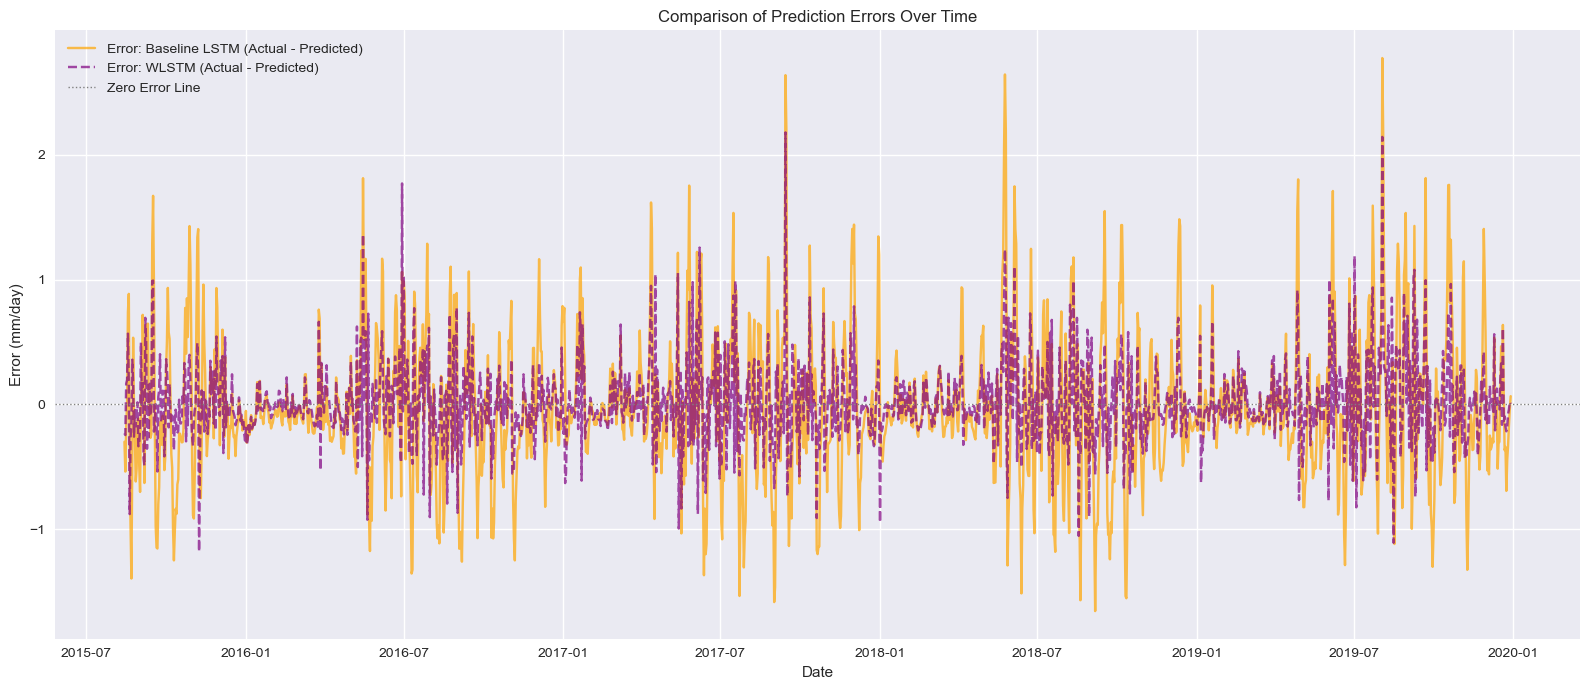

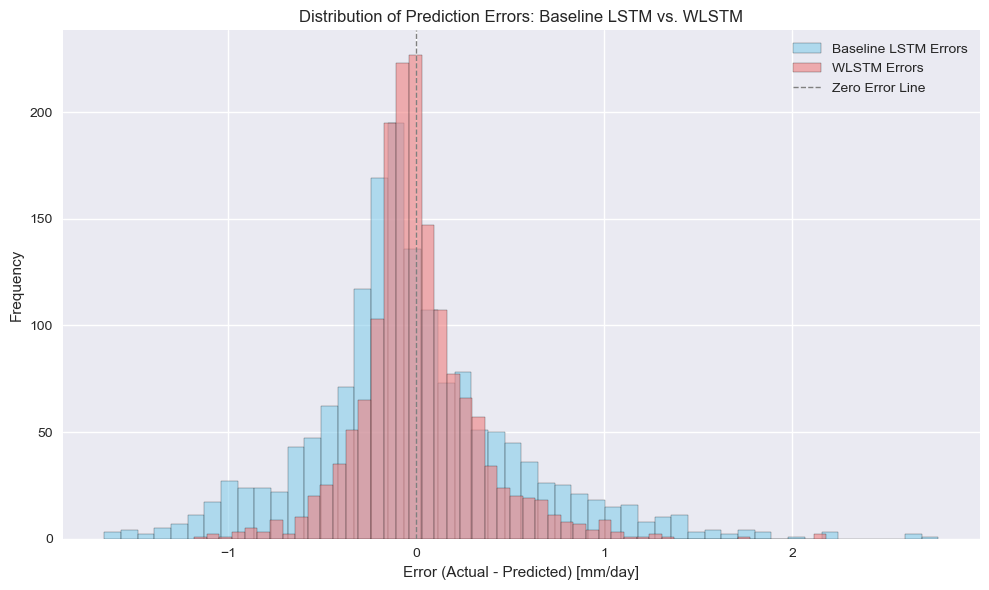

In [ ]:
# --- Actual Plotting Code (Model-to-Model Prediction Comparison) ---
plt.figure(figsize=(9, 9)) # Square figure for clear 45-degree line

# Scatter plot: Baseline LSTM on X-axis, WLSTM on Y-axis
plt.scatter(y_test_original, y_pred_original_BASELINE[:-2],
            alpha=0.6, s=20, color='steelblue', label='Prediction Pairs')

# Add the 45-degree reference line (y=x)
# Determine the min/max for the line based on the range of *both* sets of predictions
min_val = min(y_test_original.min(), y_pred_original_BASELINE[:-2].min())
max_val = max(y_test_original.max(), y_pred_original_BASELINE[:-2].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='1:1 Reference Line')

# Add labels and title
plt.title('Actual vs. predictions for Baseline LSTM')
plt.xlabel('Actual series [mm/day]')
plt.ylabel('Predictions with baseline LSTM [mm/day]')
plt.legend()
plt.grid(True)
plt.axis('equal') # Crucial for the 45-degree line to appear correctly
plt.tight_layout()
plt.show()



#--plotting for WLSTM and actual values
plt.figure(figsize=(9, 9)) # Square figure for clear 45-degree line

# Scatter plot: Baseline LSTM on X-axis, WLSTM on Y-axis
plt.scatter(y_test_original, y_pred_original,
            alpha=0.6, s=20, color='steelblue', label='Prediction Pairs')

# Add the 45-degree reference line (y=x)
# Determine the min/max for the line based on the range of *both* sets of predictions
min_val = min(y_test_original.min(), y_pred_original.min())
max_val = max(y_test_original.max(), y_pred_original.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='1:1 Reference Line')

# Add labels and title
plt.title('Actual vs. predictions for Wavelet LSTM (WLSTM)')
plt.xlabel('Actual series [mm/day]')
plt.ylabel('Predictions with WLSTM [mm/day]')
plt.legend()
plt.grid(True)
plt.axis('equal') # Crucial for the 45-degree line to appear correctly
plt.tight_layout()
plt.show()


# Plot actual vs. predicted values
test_dates_start_index = trmm_features.index[n_steps_in + train_size]
test_dates = trmm_features.loc[test_dates_start_index:].index[:len(y_test_original_BASELINE)]
# --- NEW PLOT: Time Series Comparison of Errors ---
plt.figure(figsize=(16, 7))

# Calculate errors for both models
errors_baseline = y_test_original - y_pred_original_BASELINE[:-2]
errors_wlstm = y_test_original - y_pred_original

plt.plot(test_dates[:-2], errors_baseline, label='Error: Baseline LSTM (Actual - Predicted)', color='orange', alpha=0.7)
plt.plot(test_dates[:-2], errors_wlstm, label='Error: WLSTM (Actual - Predicted)', color='purple', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='gray', linestyle=':', linewidth=1, label='Zero Error Line')

plt.title('Comparison of Prediction Errors Over Time')
plt.xlabel('Date')
plt.ylabel('Error (mm/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



plt.figure(figsize=(10, 6))

plt.hist(errors_baseline, bins=50, alpha=0.6, label='Baseline LSTM Errors', color='skyblue', edgecolor='black')
plt.hist(errors_wlstm, bins=50, alpha=0.6, label='WLSTM Errors', color='lightcoral', edgecolor='black')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Zero Error Line')

plt.title('Distribution of Prediction Errors: Baseline LSTM vs. WLSTM')
plt.xlabel('Error (Actual - Predicted) [mm/day]')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()